# Analysing alignment(s)

In [3]:
import requests
import re
from Bio import AlignIO

In [84]:
dict_aa_freq={"A":0,
              "R":0,
              "N":0,
              "D":0,
              "C":0,
              "Q":0,
              "E":0,
              "G":0,
              "H":0,
              "I":0,
              "L":0,
              "K":0,
              "M":0,
              "F":0,
              "P":0,
              "S":0,
              "U":0, #Selenocysteine
              "T":0,
              "W":0,
              "Y":0,
              "V":0,
              "B":0, # D or R
              "Z":0, # E or Q
              "X":0, # Any aa
              "J":0,  # L or I
              "-":0
             }

In [4]:
def download_alignment_files(uniprot_id):
    url="https://pycom.brunel.ac.uk/alignments/"
    file_name=uniprot_id+".aln"
    
    web_url=url+file_name
    
    try:
        response = requests.get(web_url, stream=True)

        # Check if the request was successful (HTTP status code 200)
        response.raise_for_status()
        if response.status_code == 200:
        # Open the file in binary write mode and save the content
            with open(file_name, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"File downloaded successfully and saved as '{file_name}'.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
        
def convert_to_fasta(aln_file_in,fasta_file_out):
    file_data = open(aln_file_in,'r')
    count=0
    out=""
    for line in file_data:
        out+=">SEQ_%d\n"%(count)
        out+="%s"%(line)
        count+=1
    f=open(fasta_file_out,'w')
    f.write(out)
    f.close()
def read_alignment_file(file_path):
    with open(file_path, "r") as file:
        content = file.read()
        sequences = re.findall(r'[A-Z\-]+', content)
    return sequences

def calculate_position_frequency(sequences):
    position_frequency = {}
    for aa in set(sequence):
        if aa not in position_frequency[position]:
            position_frequency[position][aa] = 0
            
    for sequence in sequences:
        for position, amino_acid in enumerate(sequence):
            if position in position_frequency:
                position_frequency[position][amino_acid] = position_frequency[position].get(amino_acid, 0) + 1
            else:
                position_frequency[position] = {amino_acid: 1}



    return position_frequency

In [13]:
download_alignment_files("P62070")

File downloaded successfully and saved as 'P62070.aln'.


In [13]:
convert_to_fasta("P0C5H4.aln","P0C5H4.fasta")

In [14]:
alignment_file_path = "P62070.aln"
sequences = read_alignment_file(alignment_file_path)

In [61]:
# Generate sequence alignment compatible with https://alignmentviewer.org/ format
# you can upload the fasta file to https://alignmentviewer.org/ for analysis of the alignment
convert_to_fasta("P62070.aln","P62070.fasta")

In [99]:
N_frac=100/len(sequences)
N_frac

0.0067759859059493156

In [100]:

def calculate_position_frequency_2(i_seq):
    position_frequency = {}
    for i in range(len(i_seq[0])):
        position_frequency[i]={"A":0,
              "R":0,
              "N":0,
              "D":0,
              "C":0,
              "Q":0,
              "E":0,
              "G":0,
              "H":0,
              "I":0,
              "L":0,
              "K":0,
              "M":0,
              "F":0,
              "P":0,
              "S":0,
              "U":0, #Selenocysteine
              "T":0,
              "W":0,
              "Y":0,
              "V":0,
              "B":0, # D or R
              "Z":0, # E or Q
              "X":0, # Any aa
              "J":0,  # L or I
              "-":0
             }
    #print(dict_aa_freq)
    for sequence in i_seq:
        for position, amino_acid in enumerate(sequence):
            #print(position)
            position_frequency[position][amino_acid] = position_frequency[position][amino_acid] + N_frac
            #print(position_frequency[position])
    return position_frequency

position_frequency_2 = calculate_position_frequency_2(sequences)
position_frequency_2

{0: {'A': 0,
  'R': 0,
  'N': 0,
  'D': 0,
  'C': 0,
  'Q': 0,
  'E': 0,
  'G': 0,
  'H': 0,
  'I': 0,
  'L': 0,
  'K': 0,
  'M': 0.013551971811898631,
  'F': 0,
  'P': 0,
  'S': 0.02032795771784795,
  'U': 0,
  'T': 0,
  'W': 0,
  'Y': 0,
  'V': 0,
  'B': 0,
  'Z': 0,
  'X': 0,
  'J': 0,
  '-': 99.96612007044337},
 1: {'A': 0.04065591543569589,
  'R': 0.0067759859059493156,
  'N': 0,
  'D': 0,
  'C': 0,
  'Q': 0,
  'E': 0,
  'G': 0.0067759859059493156,
  'H': 0.0067759859059493156,
  'I': 0.0067759859059493156,
  'L': 0,
  'K': 0.0067759859059493156,
  'M': 0,
  'F': 0,
  'P': 0,
  'S': 0.02032795771784795,
  'U': 0,
  'T': 0,
  'W': 0,
  'Y': 0,
  'V': 0,
  'B': 0,
  'Z': 0,
  'X': 0,
  'J': 0,
  '-': 99.90513619728985},
 2: {'A': 0.027103943623797262,
  'R': 0.033879929529746576,
  'N': 0.027103943623797262,
  'D': 0,
  'C': 0,
  'Q': 0.013551971811898631,
  'E': 0.0067759859059493156,
  'G': 0,
  'H': 0,
  'I': 0.0067759859059493156,
  'L': 0,
  'K': 0,
  'M': 0.02032795771784795,


In [101]:
df = pd.DataFrame(position_frequency_2)

df = df.T

In [102]:
df

,A,R,N,D,C,Q,E,G,H,I,...,U,T,W,Y,V,B,Z,X,J,-
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,99.966120
1,0.040656,0.006776,0.000000,0.000000,0.000000,0.000000,0.000000,0.006776,0.006776,0.006776,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,99.905136
2,0.027104,0.033880,0.027104,0.000000,0.000000,0.013552,0.006776,0.000000,0.000000,0.006776,...,0.0,0.006776,0.000000,0.000000,0.006776,0.0,0.0,0.000000,0.0,99.830600
3,0.121968,0.006776,0.006776,0.000000,0.020328,0.020328,0.013552,0.040656,0.006776,0.013552,...,0.0,0.060984,0.000000,0.020328,0.020328,0.0,0.0,0.000000,0.0,99.444369
4,0.060984,0.013552,0.013552,0.000000,0.006776,0.000000,0.047432,0.210056,0.013552,0.006776,...,0.0,0.054208,0.000000,0.006776,0.027104,0.0,0.0,0.000000,0.0,99.349505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.115192,0.589511,0.182952,0.088088,0.386231,0.101640,0.074536,0.460767,0.460767,0.060984,...,0.0,0.142296,0.006776,0.013552,0.203280,0.0,0.0,0.000000,0.0,94.538555
200,0.040656,0.013552,0.020328,0.006776,4.641550,0.013552,0.013552,0.067760,0.040656,0.332023,...,0.0,0.060984,0.006776,0.040656,0.237160,0.0,0.0,0.006776,0.0,94.030356
201,0.237160,0.115192,0.142296,0.047432,0.514975,0.094864,0.013552,0.020328,0.020328,0.616615,...,0.0,0.609839,0.020328,0.027104,1.300989,0.0,0.0,0.000000,0.0,94.721507
202,0.020328,0.013552,0.054208,0.000000,0.047432,0.040656,0.027104,0.033880,0.013552,2.161540,...,0.0,0.067760,0.006776,0.027104,0.508199,0.0,0.0,0.000000,0.0,95.439761


In [103]:
df.iloc[98]

A     8.984957
R     3.503185
N     5.529204
D    12.230655
C     0.196504
Q     9.377964
E    18.037674
G     2.554547
H     1.463613
I     0.968966
L     1.368749
K    11.634368
M     0.501423
F     0.386231
P     2.419027
S    13.335140
U     0.000000
T     4.519583
W     0.027104
Y     0.487871
V     2.236075
B     0.000000
Z     0.000000
X     0.000000
J     0.000000
-     0.237160
Name: 98, dtype: float64

In [ ]:
df = pd.DataFrame(position_frequency)
df = df.T

output_file_path = "position_frequency_table.txt"
df.to_csv(output_file_path, sep="\t")

print(f"DataFrame saved as {output_file_path}")

In [106]:
import logomaker as lmaker



TypeError: list_example_datafiles() takes 0 positional arguments but 1 was given

In [113]:
x=lmaker.open_example_datafile("ww_sequences.fa")

Description of example matrix "ww_sequences.fa":
# 
# WW domain alignment in FASTA format.
# From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 



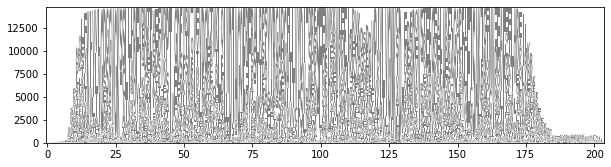

In [123]:
x=lmaker.alignment_to_matrix(sequences)
lmaker.Logo(x)

In [130]:
p_m=lmaker.transform_matrix(x,normalize_values=True)
log_m=lmaker.transform_matrix(p_m,from_type="probability",to_type="information",normalize_values=False)

In [131]:
log_m

,A,B,C,D,E,F,G,H,I,K,...,N,P,Q,R,S,T,V,W,X,Y
pos,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.093089,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.899808,0.0,0.000000,0.000000,0.000000,0.000000,0.149968,0.149968,0.149968,0.149968,...,0.000000,0.000000,0.000000,0.149968,0.449904,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.203225,0.0,0.000000,0.000000,0.050806,0.000000,0.000000,0.000000,0.050806,0.000000,...,0.203225,0.101613,0.101613,0.254031,0.050806,0.050806,0.050806,0.000000,0.000000,0.000000
3,0.170541,0.0,0.028424,0.000000,0.018949,0.028424,0.056847,0.009475,0.018949,0.037898,...,0.009475,0.009475,0.028424,0.009475,0.094745,0.085271,0.028424,0.000000,0.000000,0.028424
4,0.121166,0.0,0.013463,0.000000,0.094241,0.000000,0.417351,0.026926,0.013463,0.053852,...,0.026926,0.067315,0.000000,0.026926,0.215407,0.107704,0.053852,0.000000,0.000000,0.013463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.018330,0.0,0.061459,0.014017,0.011861,0.018330,0.073320,0.073320,0.009704,0.219959,...,0.029112,0.098119,0.016173,0.093806,0.044207,0.022643,0.032347,0.001078,0.000000,0.002156
200,0.020096,0.0,2.294254,0.003349,0.006699,0.006699,0.033493,0.020096,0.164114,0.010048,...,0.010048,0.003349,0.006699,0.006699,0.097129,0.030143,0.117225,0.003349,0.003349,0.020096
201,0.049038,0.0,0.106483,0.009808,0.002802,0.018214,0.004203,0.004203,0.127499,0.018214,...,0.029423,0.008407,0.019615,0.023819,0.103681,0.126098,0.269009,0.004203,0.000000,0.005604


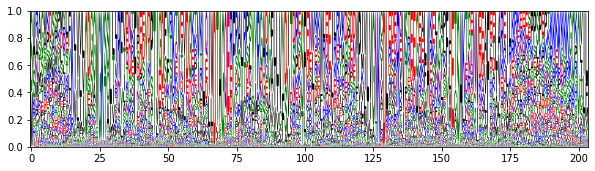

In [124]:
lmaker.Logo(,
            color_scheme="chemistry",
            font_name='Arial Rounded MT Bold'
           )

In [ ]:
lmaker.Logo(log_m,vpad=0.1,width=0.8,figsize=(21,4),color_scheme="chemistry")